In [1]:
import sqlite3
dbfile = r'C:\Users\Venky.DESKTOP-GRS8ME6\Downloads\Haensel_Task\challenge.db'
con = sqlite3.connect(dbfile)
cur = con.cursor()
table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]
print(table_list)

[('conversions',), ('conversions_backend',), ('api_adwords_costs',), ('attribution_customer_journey',), ('session_sources',)]


In [173]:
api = pd.read_sql_query("SELECT * FROM api_adwords_costs",con)
api.head()

,event_date,campaign_id,cost,clicks
0,2021-07-04,campaign_id_149,3554.289,5256
1,2021-07-03,campaign_id_149,3021.879,6180
2,2021-07-01,campaign_id_149,2986.968,7467
3,2021-07-02,campaign_id_149,2596.872,4761
4,2021-07-28,campaign_id_149,2553.928,3479


In [185]:
df = pd.read_sql_query("SELECT * FROM session_sources",con)
df.head()

,session_id,user_id,event_date,event_time,channel_name,campaign_name,campaign_id,market,cpc
0,session_id_660241,user_id_814496,2021-07-03,05:30:20,Affiliate,campaign_name_716,notset,NL,0.018
1,session_id_9812,user_id_752875,2021-07-19,16:00:40,Affiliate,campaign_name_108,notset,FR,0.000
2,session_id_780253,user_id_156905,2021-07-31,07:50:23,Affiliate,campaign_name_741,notset,DE,0.022
3,session_id_785994,user_id_540849,2021-07-16,09:43:00,Affiliate,campaign_name_741,notset,DE,0.000
4,session_id_1240841,user_id_275214,2021-07-12,08:36:41,Affiliate,campaign_name_893,notset,NL,0.188


### Question 1

#### The costs in the 'api_adwords_costs' table are not fully covered in the 'session_sources' table. 
#### From the below two queries we can see that the count of campaign id's do not match.

In [5]:
df1 = pd.read_sql_query("SELECT COUNT(DISTINCT(campaign_id)) FROM api_adwords_costs",con)
df1

,COUNT(DISTINCT(campaign_id))
0,109


In [6]:
df1 = pd.read_sql_query("SELECT COUNT(DISTINCT(campaign_id)) FROM session_sources",con)
df1

,COUNT(DISTINCT(campaign_id))
0,164


In [123]:
df.cpc.describe()

count    1.616702e+06
mean     4.207788e-01
std      1.057887e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.880000e-01
max      4.412500e+02
Name: cpc, dtype: float64

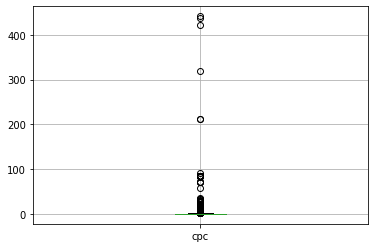

In [186]:
boxplot = df.boxplot(column=['cpc'])

#### We have taken the statistical analysis in the above code.
#### We have extracted all the campaign id's which has a cost which exceeds  5 times of standard deviation from the mean and consider them to be abnormal.
#### This has been taken as cost per click is considered high for these campaigns.

In [175]:
ab = df.groupby(['campaign_name'])['cpc'].sum()
tr = df.cpc.mean()+ 5* df.cpc.std()
result = ab[ab > tr ]
result.count()

130

In [176]:
result.head()

campaign_name
campaign_name_10       4131.524
campaign_name_1014    27269.365
campaign_name_1015      341.327
campaign_name_1022       28.385
campaign_name_1032     2691.951
Name: cpc, dtype: float64

### Question 2
#### Answer provided in excel file.

In [172]:
df2 = pd.read_sql_query("SELECT * FROM conversions",con)
df2.to_excel('df.xlsx')

### Question 3

In [177]:
dfc = pd.read_sql_query("SELECT * FROM conversions",con)
dfc.head()

,conv_id,user_id,conv_date,market,revenue
0,conv_id_16788,user_id_569581,2021-07-15,NL,219.73
1,conv_id_9916,user_id_62541,2021-07-15,DE,104.21
2,conv_id_8443,user_id_494266,2021-07-15,NL,55.69
3,conv_id_8107,user_id_215383,2021-07-15,NL,66.12
4,conv_id_7835,user_id_69012,2021-07-15,AT,25.71


In [178]:
dfcb = pd.read_sql_query("SELECT * FROM conversions_backend",con)
dfcb.head()

,conv_id,user_id,conv_date,market,revenue
0,conv_id_16788,user_id_569581,2021-07-15,NL,219.73
1,conv_id_9916,user_id_62541,2021-07-15,DE,104.21
2,conv_id_8443,user_id_494266,2021-07-15,NL,55.69
3,conv_id_8107,user_id_215383,2021-07-15,NL,66.12
4,conv_id_7835,user_id_69012,2021-07-15,AT,25.71


#### Here are some analysis performed to find the issues between the 'conversions' table and 'conversions_backend' table.

##### The count of records in the conversions backend table is higher than the conversions table.

In [88]:
dfc.conv_id.nunique()

16938

In [89]:
dfcb.conv_id.nunique()

17283

#### There are more unique users in the conversions backend table than the conversions table.

In [90]:
dfc.user_id.nunique()

16373

In [91]:
dfcb.user_id.nunique()

16684

####  Both start and end dates are similar in both the tables.

In [92]:
min_date = dfcb.conv_date.min()
print("Start date:", min_date)
max_date = dfcb.conv_date.max()
print("End date:", max_date)

Start date: 2021-07-15
End date: 2021-07-31


In [93]:
min_date = dfc.conv_date.min()
print("Starting date:", min_date)
max_date = dfc.conv_date.max()
print("Ending date:", max_date)

Starting date: 2021-07-15
Ending date: 2021-07-31


#### The unique values of market column from the both tables are same.

In [94]:
dfc.market.nunique()

28

In [95]:
dfcb.market.nunique()

28

##### There are more number of records in the conversions backend table:
##### 1. Count of revenue is less in 'conversions' table.
##### 2. The mean is slightly more in the 'conversions_backend' table indicating that there are different values in both the tables.

In [96]:
dfc.revenue.describe()

count    16954.000000
mean        50.082734
std         55.872318
min          0.000000
25%         25.130000
50%         39.670000
75%         65.340000
max       1839.200000
Name: revenue, dtype: float64

In [97]:
dfcb.revenue.describe()

count    17283.000000
mean        50.758020
std         56.360585
min          0.000000
25%         26.180000
50%         40.330000
75%         65.830000
max       1839.200000
Name: revenue, dtype: float64

### Question 4

In [187]:
df4 = pd.read_sql_query("SELECT * FROM conversions",con)
df4.head()

,conv_id,user_id,conv_date,market,revenue
0,conv_id_16788,user_id_569581,2021-07-15,NL,219.73
1,conv_id_9916,user_id_62541,2021-07-15,DE,104.21
2,conv_id_8443,user_id_494266,2021-07-15,NL,55.69
3,conv_id_8107,user_id_215383,2021-07-15,NL,66.12
4,conv_id_7835,user_id_69012,2021-07-15,AT,25.71


#### The attibution levels are not consistent. 
#### As per the problem statement sum of ihc should be 1 for each conv_id but I have found this is not the case.
#### As per the below query we can see the False count is "1806" conversions which does not match the criteria.

In [180]:
ab = df4.groupby(['conv_id'])['ihc'].sum()
abc = ab == 1
abc.value_counts() 

True     5194
False    1806
Name: ihc, dtype: int64